# Dfs2 - Slicing

In [1]:
import mikeio
import matplotlib.pyplot as plt

In [2]:
ds = mikeio.read("../tests/testdata/waves.dfs2")
ds

<mikeio.Dataset>
dims: (time:3, y:31, x:31)
time: 2004-01-01 00:00:00 - 2004-01-03 00:00:00 (3 records)
geometry: Grid2D (ny=31, nx=31)
items:
  0:  Sign. Wave Height <Significant wave height> (meter)
  1:  Peak Wave Period <Wave period> (second)
  2:  Mean Wave Direction <Mean Wave Direction> (degree)

In [3]:
ds.geometry.find_index(x=1400, y=0)

(array([27]), array([0]))

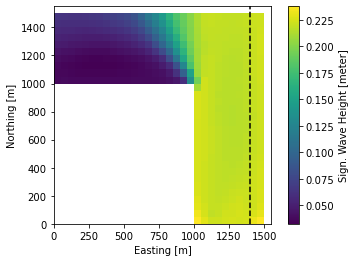

In [4]:
ds[0].plot()
plt.axvline(1400,c='k', linestyle='dashed');

In [5]:
ds_col = ds.isel(28, axis=2)
ds_col

<mikeio.Dataset>
dims: (time:3, y:31)
time: 2004-01-01 00:00:00 - 2004-01-03 00:00:00 (3 records)
geometry: Grid1D (n=31, dx=50)
items:
  0:  Sign. Wave Height <Significant wave height> (meter)
  1:  Peak Wave Period <Wave period> (second)
  2:  Mean Wave Direction <Mean Wave Direction> (degree)

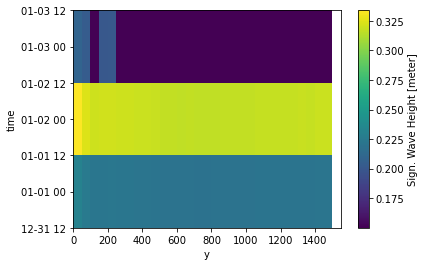

In [6]:
ds_col[0].plot();

In [7]:
ds_col.to_dfs("waves_x1400.dfs1")

In [8]:
dsnew = mikeio.read("waves_x1400.dfs1")
dsnew

<mikeio.Dataset>
dims: (time:3, x:31)
time: 2004-01-01 00:00:00 - 2004-01-03 00:00:00 (3 records)
geometry: Grid1D (n=31, dx=50)
items:
  0:  Sign. Wave Height <Significant wave height> (meter)
  1:  Peak Wave Period <Wave period> (second)
  2:  Mean Wave Direction <Mean Wave Direction> (degree)

In [9]:
import os
os.remove("waves_x1400.dfs1")